# Import Overlay
导入Overlay

In [16]:
import pynq.lib.dma
import numpy as np

vsol = pynq.Overlay("vs.bit")

dma0 = vsol.axi_dma_0
dma1 = vsol.axi_dma_1
dma2 = vsol.axi_dma_2

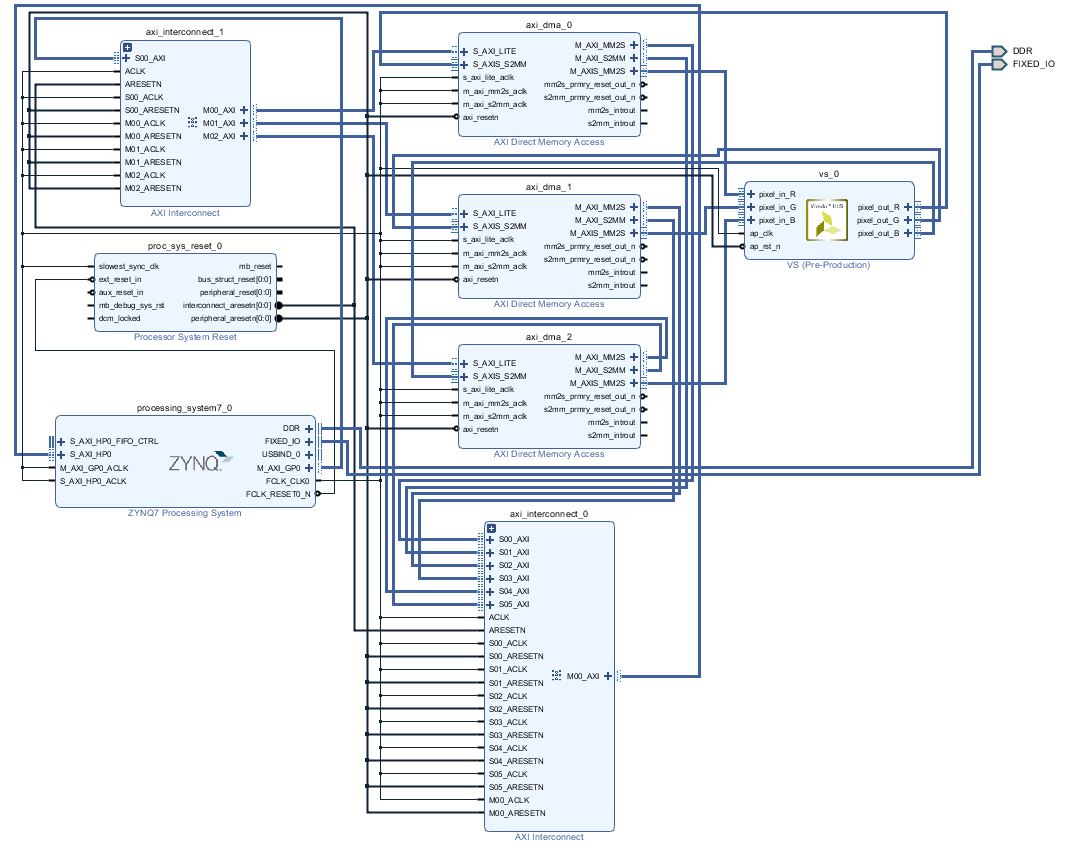

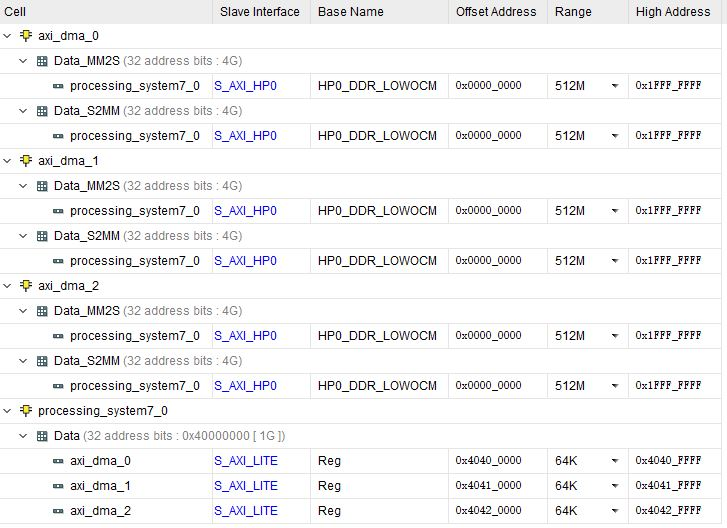

In [17]:
from pynq import Xlnk
xlnk = Xlnk()

Rin = xlnk.cma_array(shape=(16,16), dtype=np.uint8)
Gin = xlnk.cma_array(shape=(16,16), dtype=np.uint8)
Bin = xlnk.cma_array(shape=(16,16), dtype=np.uint8)
Rout = xlnk.cma_array(shape=(16,16), dtype=np.uint)
Gout = xlnk.cma_array(shape=(16,16), dtype=np.uint)
Bout = xlnk.cma_array(shape=(16,16), dtype=np.uint)

for i in range(16):
    for j in range(16):
        Rin[i][j] = 2*i;
        Gin[i][j] = 255-i*i;
        Bin[i][j] = i;     
        
dma0.sendchannel.transfer(Rin)
dma1.sendchannel.transfer(Gin)
dma2.sendchannel.transfer(Bin)
dma0.recvchannel.transfer(Rout)
dma1.recvchannel.transfer(Gout)
dma2.recvchannel.transfer(Bout)


# Do a filter test
做一个滤镜测试

In [18]:
from PIL import Image
vstest = Image.open('./data/vstest_32x20.png')

testarray = np.array(vstest)

red = testarray[:,:,0]
green = testarray[:,:,1]
blue = testarray[:,:,2]
vstest

In [19]:
import pynq.lib.dma

vsol = pynq.Overlay("vs.bit")

dma0 = vsol.axi_dma_0
dma1 = vsol.axi_dma_1
dma2 = vsol.axi_dma_2


from pynq import Xlnk
xlnk = Xlnk()

Rin = xlnk.cma_array(shape=(20,32), dtype=np.uint8)
Gin = xlnk.cma_array(shape=(20,32), dtype=np.uint8)
Bin = xlnk.cma_array(shape=(20,32), dtype=np.uint8)
Rout = xlnk.cma_array(shape=(20,32), dtype=np.uint)
Gout = xlnk.cma_array(shape=(20,32), dtype=np.uint)
Bout = xlnk.cma_array(shape=(20,32), dtype=np.uint)

for i in range(20):
    for j in range(32):
        Rin[i][j] = red[i][j];
        Gin[i][j] = green[i][j];
        Bin[i][j] = blue[i][j];
        
dma0.sendchannel.transfer(Rin)
dma1.sendchannel.transfer(Gin)
dma2.sendchannel.transfer(Bin)
dma0.recvchannel.transfer(Rout)
dma1.recvchannel.transfer(Gout)
dma2.recvchannel.transfer(Bout)
Bout

ContiguousArray([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,  40,  41,  41,  45,  56,
                   70, 102, 142, 143, 120, 110, 110, 108,  96,   0],
                 [  0,  48,  51,  55,  60,  68,  76, 105, 143, 143, 128,
                  127, 130, 125, 110,   0,   0,  56,  61,  69,  74,  78,
                   86, 113, 145, 155, 156, 160, 160, 153, 138,   0],
                 [  0,  68,  73,  84,  93, 100, 113, 135, 151, 159, 166,
                  170, 168, 167, 166,   0,   0,  79,  85,  99, 112, 120,
                  134, 157, 168, 172, 180, 185, 180, 183, 194,   0],
                 [  0, 100, 109, 117, 125, 128, 141, 159, 162, 171, 184,
                  190, 190, 196, 211,   0,   0, 120, 132, 135, 137, 136,
                  142, 146, 146, 175, 202, 205, 204, 208, 211,   0],
                 [  0, 109, 115, 128, 132, 114, 107, 118, 140, 174, 209,
                  223, 220, 220, 210,   0,   0,  99,  98, 121, 125,

In [21]:
newimage = np.zeros((20,32,3), dtype=np.uint8)
newimage[:,:,0] = Rout;
newimage[:,:,1] = Gout;
newimage[:,:,2] = Bout;
img = Image.fromarray(newimage,'RGB')
img.save('./data/vstest_after.png')
img
